**Which is the most trending movie genres accordingly its rate along the mentioned generations ?**

**Read TMDB_Movies CSV file**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
movies = pd.read_csv("tmdb-movies (1).csv")
movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


**Show Dataset info**

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**Getting the main genre of the movie by splitting the genres column**

In [ ]:
movies['Movie Genre'] = movies['genres'].str.split('|').str[0]

**Show unique genres of TMDB dataset**

In [ ]:
movies['Movie Genre'].unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', nan, 'Foreign'], dtype=object)

**Drop all rows which contain NA values in genres**

In [ ]:
movies = movies[movies['Movie Genre'].notna()]

**Show number of duplicated movies rows in TMDB dataset**

In [ ]:
movies.duplicated().sum()

1

**Drop all  duplicated movies rows in TMDB dataset**

In [ ]:
movies.drop_duplicates(inplace = True)
movies

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Movie Genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00,Documentary
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00,Action
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00,Mystery
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00,Action


**Counting genres of all the TMDB dataset**

In [ ]:
movies['Movie Genre'].value_counts()


Drama        2453
Comedy       2319
Action       1590
Horror        915
Adventure     586
Name: Movie Genre, dtype: int64

**Getting the most movie genres performed which are "Drama" and "Comedy" and "Action" and "Horror" and "Adventure"**

In [ ]:
movies = movies.loc[(movies['Movie Genre'] == "Drama") | (movies['Movie Genre'] == "Comedy") | (movies['Movie Genre'] == "Action") | \
                    (movies['Movie Genre'] == "Horror") | (movies['Movie Genre'] == "Adventure")]

**Divided the movies into 60th generation**

In [ ]:
movies_60s = movies[movies["release_year"] < 1970]
movies_60s.reset_index(inplace = True)
movies_60s.drop(labels = ['index'], axis = 1, inplace = True)
movies_60s

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Movie Genre
0,871,tt0063442,1.152937,5800000,33395426,Planet of the Apes,Charlton Heston|Roddy McDowall|Kim Hunter|Maur...,NaN,Franklin J. Schaffner,"Somewhere in the Universe, there must be somet...",human evolution|gorilla|bondage|space marine|c...,Taylor and two other astronauts come out of de...,112,Adventure|Science Fiction|Mystery,Twentieth Century Fox Film Corporation|APJAC P...,2/7/68,469,7.2,1968,3.635999e+07,2.093547e+08,Adventure
1,10331,tt0063350,1.058272,114000,0,Night of the Living Dead,Duane Jones|Judith O'Dea|Karl Hardman|Marilyn ...,NaN,George A. Romero,"If it doesn't scare you, you're already dead!",loss of father|siblings|midnight movie|zombies,A group of people try to survive an attack of ...,96,Horror,Laurel Group|Off Color Films|Image Ten|Market ...,10/1/68,279,7.2,1968,7.146619e+05,0.000000e+00,Horror
2,916,tt0062765,0.786854,5500000,42300873,Bullitt,Steve McQueen|Jacqueline Bisset|Robert Vaughn|...,NaN,Peter Yates,"There are bad cops, good cops - and then there...",san francisco|hotel|detective|based on novel|a...,Senator Walter Chalmers is aiming to take down...,113,Action|Crime|Drama|Thriller,Solar Productions|Warner Brothers/Seven Arts,10/17/68,143,6.7,1968,3.447930e+07,2.651826e+08,Action
3,14136,tt0064603,0.757746,0,0,The Love Bug,Dean Jones|Michele Lee|Buddy Hackett|Joe Flynn...,NaN,Robert Stevenson,Herbie will honk his way into your heart.,car race|suicide attempt|sport|golden gate bri...,Herbie is a car - but no ordinary car. The sto...,107,Comedy|Family|Fantasy,Walt Disney Productions,12/22/68,62,5.8,1968,0.000000e+00,0.000000e+00,Comedy
4,18988,tt0063227,0.747337,0,0,The Lion in Winter,Peter O'Toole|Katharine Hepburn|Anthony Hopkin...,NaN,Anthony Harvey,The most significant reserved seat attraction ...,england|infidelity|famous score|queen|castle,1183 AD: King Henry II's three sons all want t...,134,Drama|History,AVCO Embassy Pictures|Haworth Productions,1/1/68,37,6.9,1968,0.000000e+00,0.000000e+00,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,31918,tt0060921,0.317824,0,0,"The Russians Are Coming, The Russians Are Coming",Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,NaN,Norman Jewison,IT'S A PLOT! ...to make the world die laughing!!,cold war|russian|new england,"Without hostile intent, a Soviet sub runs agro...",126,Comedy|War,The Mirisch Corporation,5/25/66,11,5.5,1966,0.000000e+00,0.000000e+00,Comedy
266,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,monster|carry on|horror spoof,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.000000e+00,0.000000e+00,Comedy
267,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00,Action
268,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00,Action


**Divided the 60's generation movies accordingly to its genre**

**Calculate its mean of rate for each movie**

In [ ]:
drama_movies_60s = movies_60s[movies_60s['Movie Genre'] == 'Drama']
drama_mean_rating = drama_movies_60s['vote_average'].mean()
comedy_movies_60s = movies_60s[movies_60s['Movie Genre'] == 'Comedy']
comedy_mean_rating = comedy_movies_60s['vote_average'].mean()
action_movies_60s = movies_60s[movies_60s['Movie Genre'] == 'Action']
action_mean_rating = action_movies_60s['vote_average'].mean()
horror_movies_60s = movies_60s[movies_60s['Movie Genre'] == 'Horror']
horror_mean_rating = horror_movies_60s['vote_average'].mean()
adventure_movies_60s = movies_60s[movies_60s['Movie Genre'] == 'Adventure']
adventure_mean_rating = adventure_movies_60s['vote_average'].mean()
genres_mean_rating_60s = [drama_mean_rating, comedy_mean_rating, action_mean_rating, horror_mean_rating, adventure_mean_rating]
genres_mean_rating_60s

[6.456410256410256,
 6.26081081081081,
 6.049999999999999,
 6.022580645161291,
 6.312903225806452]

**Plotting between the mean of each genre**

<BarContainer object of 5 artists>

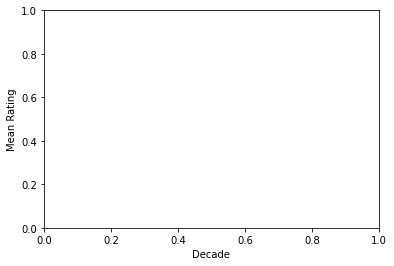

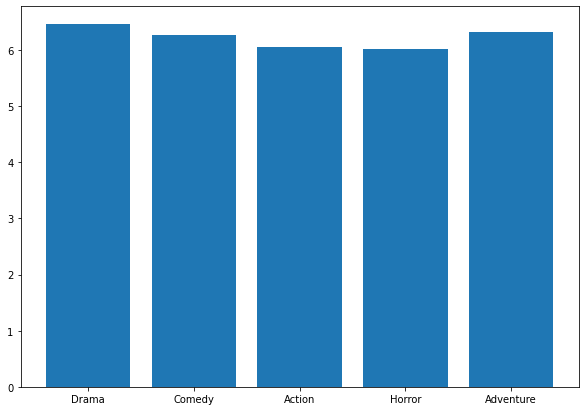

In [ ]:
fig,ax = plt.subplots(1)
plt.figure(figsize=(10,7))
ax.set_xlabel('Decade')
ax.set_ylabel('Mean Rating')
plt.bar(["Drama" ,"Comedy","Action","Horror","Adventure"],genres_mean_rating_60s)

**As shown above in barchart , the most trending movies genre in 60's generation  are "Drama"  and "Adventure"**

**Divided the movies into 70's generation**

In [ ]:
movies_70s = movies[movies["release_year"] < 1980]
movies_70s = movies_70s[movies["release_year"] > 1969]
movies_70s.reset_index(inplace = True)
movies_70s.drop(labels = ['index'], axis = 1, inplace = True)
movies_70s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Movie Genre
0,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",android|galaxy|hermit|death star|lightsaber,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,Adventure
1,691,tt0076752,2.379469,14000000,185438673,The Spy Who Loved Me,Roger Moore|Barbara Bach|Curd JÃ¼rgens|Richard...,http://www.mgm.com/view/movie/1891/The-Spy-Who...,Lewis Gilbert,It's the BIGGEST. It's the BEST. It's BOND. An...,london|submarine|england|assassination|spy,Russian and British submarines with nuclear mi...,125,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,7/7/77,279,6.2,1977,5.036893e+07,6.671677e+08,Adventure
2,703,tt0075686,1.179653,4000000,38251425,Annie Hall,Woody Allen|Diane Keaton|Tony Roberts|Carol Ka...,NaN,Woody Allen,A nervous romance.,neurosis|comedian|job interview|love|singer,"In the city of New York, comedian Alvy Singer ...",93,Comedy|Drama|Romance,United Artists,4/19/77,493,7.6,1977,1.439112e+07,1.376203e+08,Comedy
3,5902,tt0075784,1.048838,22000000,50750000,A Bridge Too Far,Dirk Bogarde|James Caan|Michael Caine|Sean Con...,NaN,Richard Attenborough,Out of the sky comes the screen's most incredi...,netherlands|world war ii|operation market gard...,Tells the story of operation Market Garden. A ...,175,Drama|History|War,Joseph E. Levine Productions,6/15/77,109,6.4,1977,7.915118e+07,1.825874e+08,Drama
4,11940,tt0076716,0.751250,3500000,16000000,Sinbad and the Eye of the Tiger,Patrick Wayne|Taryn Power|Margaret Whiting|Jan...,NaN,Sam Wanamaker,New!! Sinbad's Boldest And Most Daring Adventure!,monster|step mother,Princess Farah refuses to marry Sinbad until P...,113,Action|Adventure|Family|Fantasy|Science Fiction,Columbia Pictures|Andor Films,7/15/77,15,5.9,1977,1.259223e+07,5.756450e+07,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,19378,tt0077305,0.072267,0,0,The Cat from Outer Space,Ken Berry|Sandy Duncan|Harry Morgan|Roddy McDo...,NaN,Norman Tokar,A close encounter of the 'furred' kind!,cat|alien,A UFO is stranded on earth and impounded by th...,104,Comedy|Family|Science Fiction,Walt Disney Productions,6/9/78,14,5.6,1978,0.000000e+00,0.000000e+00,Comedy
374,31657,tt0077362,0.065504,3000000,0,Coming Home,Jane Fonda|Jon Voight|Bruce Dern|Penelope Milf...,NaN,Hal Ashby,A man who believed in war! A man who believed ...,wheelchair|vietnam|war|volunteer|love,"The wife of a Marine serving in Vietnam, Sally...",127,Drama|Romance|War,United Artists|Jerome Hellman Productions|Jayn...,2/15/78,16,5.8,1978,1.002810e+07,0.000000e+00,Drama
375,16378,tt0077147,0.064602,0,0,The Rutles: All You Need Is Cash,Eric Idle|John Halsey|Ricky Fataar|Neil Innes|...,NaN,Eric Idle|Gary Weis,NaN,musical|mockumentary,The story of the rise and fall of the Pre-Fab ...,76,Comedy,NaN,3/22/78,14,6.0,1978,0.000000e+00,0.000000e+00,Comedy
376,39995,tt0079482,0.047645,0,0,Long Weekend,John Hargreaves|Briony Behets|Mike McEwen|Roy ...,NaN,Colin Eggleston,Their crime was against nature. Nature found t...,beach|camping|attack|nature,When a suburban couple go camping for the week...,92,Horror|Thriller|Mystery,The Australian Film Commission|Victorian Film|...,10/14/78,17,6.1,1978,0.000000e+00,0.000000e+00,Horror


**Divided the 70's generation movies accordingly to its genre**

**Calculate its mean of rate for each movie**

In [ ]:
drama_movies_70s = movies_70s[movies_70s['Movie Genre'] == 'Drama']
drama_mean_rating = drama_movies_70s['vote_average'].mean()
comedy_movies_70s = movies_70s[movies_70s['Movie Genre'] == 'Comedy']
comedy_mean_rating = comedy_movies_70s['vote_average'].mean()
action_movies_70s = movies_70s[movies_70s['Movie Genre'] == 'Action']
action_mean_rating = action_movies_70s['vote_average'].mean()
horror_movies_70s = movies_70s[movies_70s['Movie Genre'] == 'Horror']
horror_mean_rating = horror_movies_70s['vote_average'].mean()
adventure_movies_70s = movies_70s[movies_70s['Movie Genre'] == 'Adventure']
adventure_mean_rating = adventure_movies_70s['vote_average'].mean()
genres_mean_rating_70s = [drama_mean_rating, comedy_mean_rating, action_mean_rating, horror_mean_rating, adventure_mean_rating]
genres_mean_rating_70s

[6.5009174311926605,
 6.433766233766233,
 6.359139784946238,
 6.10735294117647,
 6.2870967741935475]

**Plotting between the mean of each genre**

<BarContainer object of 5 artists>

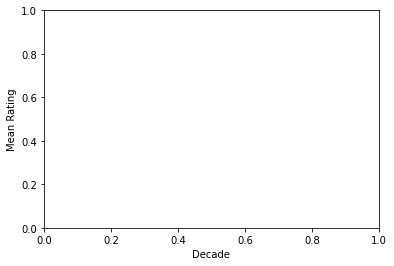

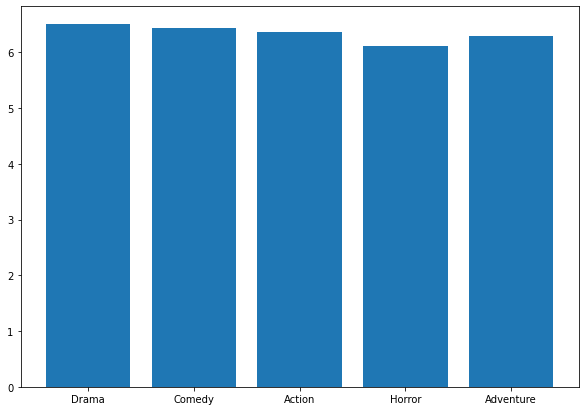

In [ ]:
fig,ax = plt.subplots(1)
plt.figure(figsize=(10,7))
ax.set_xlabel('Decade')
ax.set_ylabel('Mean Rating')
plt.bar(["Drama" ,"Comedy","Action","Horror","Adventure"],genres_mean_rating_70s)

**As shown above in barchart , the most trending movies genre in 70's generation  are "Drama"  and "Comedy"**

**Divided the movies into 80's generation**

In [ ]:
movies_80s = movies[movies["release_year"] < 1990]
movies_80s = movies_80s[movies["release_year"] > 1979]
movies_80s.reset_index(inplace = True)
movies_80s.drop(labels = ['index'], axis = 1, inplace = True)
movies_80s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Movie Genre
0,105,tt0088763,6.095293,19000000,381109762,Back to the Future,Michael J. Fox|Christopher Lloyd|Lea Thompson|...,http://www.backtothefuture.com/movies/backtoth...,Robert Zemeckis,He's the only kid ever to get into trouble bef...,clock tower|car race|terrorist|delorean|lightning,Eighties teenager Marty McFly is accidentally ...,116,Adventure|Comedy|Science Fiction|Family,Universal Pictures|Amblin Entertainment|U-Driv...,7/3/85,3785,7.8,1985,3.851615e+07,7.725728e+08,Adventure
1,2108,tt0088847,2.834739,1000000,51525171,The Breakfast Club,Emilio Estevez|Anthony Michael Hall|Judd Nelso...,NaN,John Hughes,"They only met once, but it changed their lives...",high school|tardy hall|teenager|detention,"Five high school students, all different stere...",97,Comedy|Drama,Universal Pictures|Channel Productions|A&M Films,2/15/85,1139,7.6,1985,2.027166e+06,1.044501e+08,Comedy
2,526,tt0089457,1.753688,20000000,18432000,Ladyhawke,Matthew Broderick|Rutger Hauer|Michelle Pfeiff...,NaN,Richard Donner,No force in Heaven will release them. No power...,moon|monk|swordplay|bishop|cathedral,Captain Etienne Navarre is a man on whose shou...,121,Adventure|Fantasy,Twentieth Century Fox Film Corporation|Warner ...,4/3/85,124,6.6,1985,4.054332e+07,3.736472e+07,Adventure
3,9355,tt0089530,1.746063,12305523,36230219,Mad Max Beyond Thunderdome,Mel Gibson|Tina Turner|Bruce Spence|Helen Buda...,NaN,George Miller|George Ogilvie,Two men enter. One man leaves.,arena|sandstorm|dystopia|oasis|sequel,Mad Max becomes a pawn in a decadent oasis of ...,107,Action|Adventure|Drama|Science Fiction,Kennedy Miller Productions,6/29/85,428,5.8,1985,2.494534e+07,7.344467e+07,Action
4,707,tt0090264,1.623978,30000000,152427960,A View to a Kill,Roger Moore|Christopher Walken|Tanya Roberts|G...,http://www.mgm.com/view/movie/2101/A-View-to-a...,John Glen,Has James Bond finally met his match?,paris|london|france|england|san francisco,A newly developed microchip designed by Zorin ...,131,Adventure|Action|Thriller,Eon Productions,5/24/85,272,5.8,1985,6.081498e+07,3.089968e+08,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,33516,tt0091142,0.080517,0,0,Gothic,Gabriel Byrne|Julian Sands|Natasha Richardson|...,NaN,Ken Russell,"Conjure up your deepest, darkest fear... now c...",opium|literature|frankenstein|mystery|drug,The year is 1816. A sprawling villa in Switzer...,84,Drama|Fantasy|Horror,NaN,11/30/86,10,4.2,1986,0.000000e+00,0.000000e+00,Drama
831,34223,tt0092147,0.076196,1900000,4790926,Vamp,Chris Makepeace|Sandy Baron|Robert Rusler|Dede...,NaN,Richard Wenk,A Frightening Comedy,female nudity|nudity|vampire|strip club|chase,Two fraternity pledges go to a sleazy bar look...,93,Comedy|Horror,Balcor Film Investors|Planet Productions,7/18/86,12,5.2,1986,3.779872e+06,9.531099e+06,Comedy
832,24194,tt0092074,0.066529,0,0,TerrorVision,Diane Franklin|Gerrit Graham|Mary Woronov|Chad...,NaN,Ted Nicolaou,"People of Earth, your planet is about to be de...",mutant|slime|satellite|alien,A family's new satellite TV system starts rece...,83,Horror|Science Fiction|Thriller,NaN,2/14/86,14,5.1,1986,0.000000e+00,0.000000e+00,Horror
833,21867,tt0091374,0.216201,8500000,0,Lady Jane,Helena Bonham Carter|Cary Elwes|John Wood|Patr...,NaN,Trevor Nunn,NaN,NaN,The death of King Henry VIII throws his kingdo...,142,Drama|Romance|History,Paramount Pictures|Capital Equipment Leasing,2/7/86,13,6.4,1986,1.690995e+07,0.000000e+00,Drama


**Divided the 80's generation movies accordingly to its genre**

**Calculate its mean of rate for each movie**

In [ ]:
drama_movies_80s = movies_80s[movies_80s['Movie Genre'] == 'Drama']
drama_mean_rating = drama_movies_80s['vote_average'].mean()
comedy_movies_80s = movies_80s[movies_80s['Movie Genre'] == 'Comedy']
comedy_mean_rating = comedy_movies_80s['vote_average'].mean()
action_movies_80s = movies_80s[movies_80s['Movie Genre'] == 'Action']
action_mean_rating = action_movies_80s['vote_average'].mean()
horror_movies_80s = movies_80s[movies_80s['Movie Genre'] == 'Horror']
horror_mean_rating = horror_movies_80s['vote_average'].mean()
adventure_movies_80s = movies_80s[movies_80s['Movie Genre'] == 'Adventure']
adventure_mean_rating = adventure_movies_80s['vote_average'].mean()
genres_mean_rating_80s = [drama_mean_rating, comedy_mean_rating, action_mean_rating, horror_mean_rating, adventure_mean_rating]
genres_mean_rating_80s

[6.28376963350785,
 6.003100775193793,
 5.8502732240437165,
 5.845161290322581,
 6.115189873417721]

**Plotting between the mean of each genre**

<BarContainer object of 5 artists>

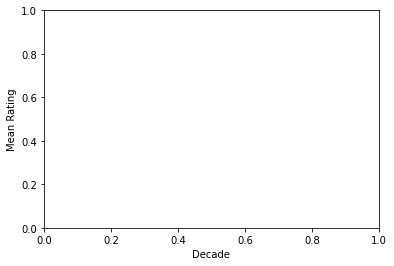

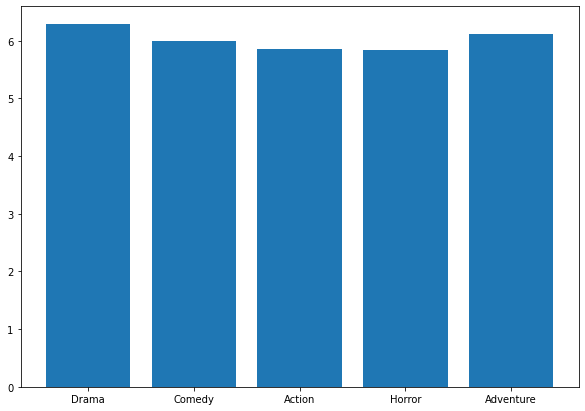

In [ ]:
fig,ax = plt.subplots(1)
plt.figure(figsize=(10,7))
ax.set_xlabel('Decade')
ax.set_ylabel('Mean Rating')
plt.bar(["Drama" ,"Comedy","Action","Horror","Adventure"],genres_mean_rating_80s)

**As shown above in barchart , the most trending movies genre in 80's generation  are "Drama"  and "Adventure"**

**Divided the movies into 90's generation**

In [ ]:
movies_90s = movies[movies["release_year"] < 2000]
movies_90s = movies_90s[movies["release_year"] > 1989]
movies_90s.reset_index(inplace = True)
movies_90s.drop(labels = ['index'], axis = 1, inplace = True)
movies_90s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Movie Genre
0,550,tt0137523,8.947905,63000000,100853753,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,http://www.foxmovies.com/movies/fight-club,David Fincher,How much can you know about yourself if you've...,support group|dual identity|nihilism|rage and ...,A ticking-time-bomb insomniac and a slippery s...,139,Drama,Regency Enterprises|Fox 2000 Pictures|Taurus F...,10/14/99,5923,8.1,1999,8.247033e+07,1.320229e+08,Drama
1,603,tt0133093,7.753899,63000000,463517383,The Matrix,Keanu Reeves|Laurence Fishburne|Carrie-Anne Mo...,http://www.warnerbros.com/matrix,Lilly Wachowski|Lana Wachowski,Welcome to the Real World.,saving the world|artificial intelligence|man v...,"Set in the 22nd century, The Matrix tells the ...",136,Action|Science Fiction,Village Roadshow Pictures|Groucho II Film Part...,3/30/99,6351,7.8,1999,8.247033e+07,6.067687e+08,Action
2,14,tt0169547,3.555720,15000000,356296601,American Beauty,Kevin Spacey|Annette Bening|Thora Birch|Wes Be...,http://www.dreamworks.com/ab/,Sam Mendes,Look closer.,adultery|coming out|loss of father|first time|...,"Lester Burnham, a depressed suburban father in...",122,Drama,DreamWorks SKG|Jinks/Cohen Company,9/15/99,1756,7.7,1999,1.963579e+07,4.664111e+08,Drama
3,1893,tt0120915,3.526029,115000000,924317558,Star Wars: Episode I - The Phantom Menace,Liam Neeson|Ewan McGregor|Natalie Portman|Jake...,http://www.starwars.com/films/star-wars-episod...,George Lucas,Every generation has a legend. Every journey h...,prophecy|senate|queen|taskmaster|galaxy,"Anakin Skywalker, a young slave strong with th...",136,Adventure|Action|Science Fiction,Lucasfilm,5/19/99,2823,6.3,1999,1.505411e+08,1.209981e+09,Adventure
4,564,tt0120616,2.943770,80000000,415885488,The Mummy,Brendan Fraser|Rachel Weisz|John Hannah|Arnold...,http://www.mummyvideo.com/,Stephen Sommers,The legend you know. The adventure you have ye...,library|secret passage|cairo|egypt|pastor,"Dashing legionnaire Rick O'Connell and Beni, h...",124,Adventure|Fantasy|Horror|Action|Thriller,Universal Pictures|Alphaville Films,5/6/99,1562,6.3,1999,1.047242e+08,5.444161e+08,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,18731,tt0108593,0.093323,0,0,Wong Fei Hung V: Tit gai dau ng gung,Jet Li|Sharla Cheung Man|Alan Chui Chung-San|D...,NaN,Wong Jing,NaN,NaN,Jet Li stars in this comic spectacle as a Chin...,111,Action|Comedy|Foreign,NaN,4/1/93,15,5.3,1993,0.000000e+00,0.000000e+00,Action
1361,9261,tt0107156,0.276654,1000000,6933459,Xi yan,Kuei Ya-Lei|Sihung Lung|May Chin|Winston Chao|...,NaN,Ang Lee,You are cordially invited to a wedding where e...,gay|new york|father-son relationship|wife husb...,A Taiwanese-American man is happily settled in...,109,Comedy|Drama|Romance,Ang Lee Productions|Good Machine,8/4/93,20,6.8,1993,1.509470e+06,1.046585e+07,Comedy
1362,1479,tt0106579,0.085248,68000,0,"Clean, Shaven",Peter Greene|Alice Levitt|Megan Owen|Jennifer ...,NaN,Lodge Kerrigan,Partition on a strange madness!,schizophrenia|terror|sex|paranoia|adoption,Peter Winter is a young schizophrenic who is d...,79,Drama|Crime,DSM III|Warner Bros.,9/5/93,11,6.3,1993,1.026440e+05,0.000000e+00,Drama
1363,25466,tt0106215,0.085043,0,0,AcciÃ³n mutante,Antonio Resines|Alex Angulo|FrÃ©dÃ©rique Feder...,NaN,Ãlex de la Iglesia,NaN,terrorist|mutant|future,In a future world ruled by good-looking people...,94,Action|Comedy|Science Fiction,CiBy 2000|El Deseo S.A.,2/3/93,18,5.6,1993,0.000000e+00,0.000000e+00,Action


**Divided the 90's generation movies accordingly to its genre**

**Calculate its mean of rate for each movie**

In [ ]:
drama_movies_90s = movies_90s[movies_90s['Movie Genre'] == 'Drama']
drama_mean_rating = drama_movies_90s['vote_average'].mean()
comedy_movies_90s = movies_90s[movies_90s['Movie Genre'] == 'Comedy']
comedy_mean_rating = comedy_movies_90s['vote_average'].mean()
action_movies_90s = movies_90s[movies_90s['Movie Genre'] == 'Action']
action_mean_rating = action_movies_90s['vote_average'].mean()
horror_movies_90s = movies_90s[movies_90s['Movie Genre'] == 'Horror']
horror_mean_rating = horror_movies_90s['vote_average'].mean()
adventure_movies_90s = movies_90s[movies_90s['Movie Genre'] == 'Adventure']
adventure_mean_rating = adventure_movies_90s['vote_average'].mean()
genres_mean_rating_90s = [drama_mean_rating, comedy_mean_rating, action_mean_rating, horror_mean_rating, adventure_mean_rating]
genres_mean_rating_90s

[6.239379474940329,
 5.93798627002289,
 5.741121495327098,
 5.453658536585366,
 5.9245283018867925]

**Plotting between the mean of each genre**

<BarContainer object of 5 artists>

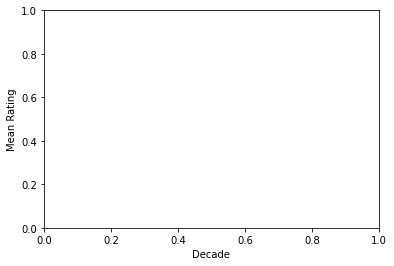

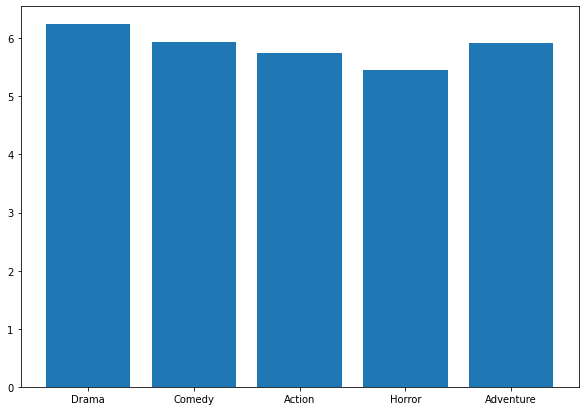

In [ ]:
fig,ax = plt.subplots(1)
plt.figure(figsize=(10,7))
ax.set_xlabel('Decade')
ax.set_ylabel('Mean Rating')
plt.bar(["Drama" ,"Comedy","Action","Horror","Adventure"],genres_mean_rating_90s)

**As shown above in barchart , the most trending movies genre in 90's generation  are "Drama"  and "Comedy"**

**Divided the movies into 2000's generation**

In [ ]:
movies_00s = movies[movies["release_year"] < 2010]
movies_00s = movies_00s[movies["release_year"] > 1999]
movies_00s.reset_index(inplace = True)
movies_00s.drop(labels = ['index'], axis = 1, inplace = True)
movies_00s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Movie Genre
0,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,Action
1,16869,tt0361748,6.098027,70000000,319131050,Inglourious Basterds,Brad Pitt|MÃ©lanie Laurent|Christoph Waltz|Eli...,http://www.inglouriousbasterds-movie.com/,Quentin Tarantino,Once upon a time in Nazi occupied France...,paris|guerilla|cinema|self sacrifice|dynamite,"In Nazi-occupied France during World War II, a...",153,Drama|Action|Thriller|War,Universal Pictures|A Band Apart|Zehnte Babelsb...,8/18/09,3969,7.7,2009,7.114803e+07,3.243649e+08,Drama
2,767,tt0417741,5.076472,250000000,933959197,Harry Potter and the Half-Blood Prince,Daniel Radcliffe|Rupert Grint|Emma Watson|Tom ...,http://harrypotter.warnerbros.com/harrypottera...,David Yates,Dark Secrets Revealed,witch|broom|school of witchcraft|magic wand|ma...,"As Harry begins his sixth year at Hogwarts, he...",153,Adventure|Fantasy|Family,Warner Bros.|Heyday Films,7/7/09,3220,7.3,2009,2.541001e+08,9.492765e+08,Adventure
3,534,tt0438488,3.789633,200000000,371353001,Terminator Salvation,Christian Bale|Sam Worthington|Anton Yelchin|M...,http://www.terminatorsalvation.com,McG,The End Begins.,saving the world|artificial intelligence|proph...,"All grown up in post-apocalyptic 2018, John Co...",115,Drama|Action|Thriller|Science Fiction,Columbia Pictures|The Halcyon Company|Wonderla...,5/20/09,1670,5.8,2009,2.032801e+08,3.774434e+08,Drama
4,17654,tt1136608,3.744956,30000000,210819611,District 9,Sharlto Copley|Jason Cope|Nathalie Boltt|Sylva...,http://www.d-9.com/,Neill Blomkamp,You are not welcome here.,slum|street gang|refugee camp|extraterrestrial...,Aliens land in South Africa and have no way ho...,112,Action|Thriller|Science Fiction,WingNut Films|TriStar Pictures|Key Creatives|B...,8/5/09,2141,7.1,2009,3.049201e+07,2.142771e+08,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,21991,tt0120202,0.059043,0,0,State and Main,Alec Baldwin|Philip Seymour Hoffman|William H....,http://www.newline.com/properties/stateandmain...,David Mamet,Big movie. Small town. Huge trouble.,film making|small town|movie in movie|statutor...,A Hollywood Film unit invades a small Vermont ...,102,Comedy|Drama,Filmtown Entertainment Group|El Dorado Picture...,8/26/00,19,5.7,2000,0.000000e+00,0.000000e+00,Comedy
2688,17856,tt0284838,0.035184,0,0,"Ali G, Aiii",Sacha Baron Cohen|John Henry|Jenna Jameson|Gai...,NaN,James Bobin|Steve Smith,NaN,NaN,Clips from Da Ali G Show with unaired sketches...,103,Comedy,NaN,11/20/00,14,5.8,2000,0.000000e+00,0.000000e+00,Comedy
2689,10385,tt0162983,0.031018,40000000,36037909,Hanging Up,Meg Ryan|Diane Keaton|Lisa Kudrow|Walter Matth...,NaN,Diane Keaton,Every family has a few hang-ups.,sister sister relationship|cheating|amnesia|cr...,A trio of sisters bond over their ambivalence ...,94,Comedy|Drama,Laurence Mark Productions|Columbia Pictures Co...,2/16/00,21,5.2,2000,5.065168e+07,4.563452e+07,Comedy
2690,20438,tt0234853,0.005784,0,0,The Tao of Steve,Donal Logue|Ayelet Kaznelson|John Hines|John H...,NaN,Jenniphr Goodman,Why do women find this man irresistible?,independent film,"Underachieving, overweight kindergarten teache...",87,Comedy|Romance,Good Machine|Thunderhead Productions,8/4/00,13,5.5,2000,0.000000e+00,0.000000e+00,Comedy


**Divided the 2000's generation movies accordingly to its genre**

**Calculate its mean of rate for each movie**

In [ ]:
drama_movies_00s = movies_00s[movies_00s['Movie Genre'] == 'Drama']
drama_mean_rating = drama_movies_00s['vote_average'].mean()
comedy_movies_00s = movies_00s[movies_00s['Movie Genre'] == 'Comedy']
comedy_mean_rating = comedy_movies_00s['vote_average'].mean()
action_movies_00s = movies_00s[movies_00s['Movie Genre'] == 'Action']
action_mean_rating = action_movies_00s['vote_average'].mean()
horror_movies_00s = movies_00s[movies_00s['Movie Genre'] == 'Horror']
horror_mean_rating = horror_movies_00s['vote_average'].mean()
adventure_movies_00s = movies_00s[movies_00s['Movie Genre'] == 'Adventure']
adventure_mean_rating = adventure_movies_00s['vote_average'].mean()
genres_mean_rating_00s = [drama_mean_rating, comedy_mean_rating, action_mean_rating, horror_mean_rating, adventure_mean_rating]
genres_mean_rating_00s

[6.181272509003593,
 5.7388059701492535,
 5.671863117870726,
 5.224710424710423,
 6.0201970443349735]

**Plotting between the mean of each genre**

<BarContainer object of 5 artists>

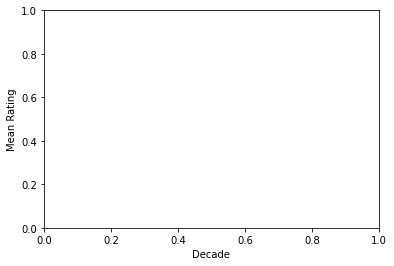

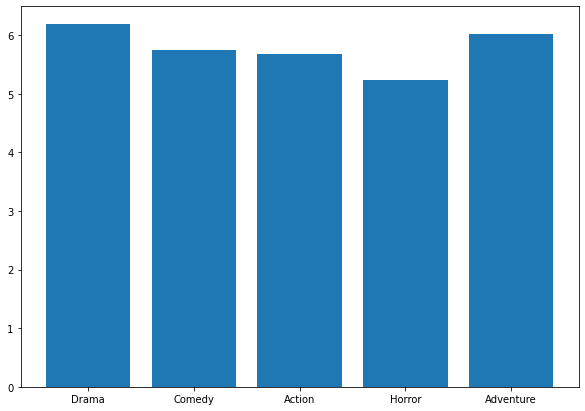

In [ ]:
fig,ax = plt.subplots(1)
plt.figure(figsize=(10,7))
ax.set_xlabel('Decade')
ax.set_ylabel('Mean Rating')
plt.bar(["Drama" ,"Comedy","Action","Horror","Adventure"],genres_mean_rating_00s)

**As shown above in barchart , the most trending movies genre in 2000's generation  are "Drama"  and "Adventure"**

**Divided the movies into 2010's generation**

In [ ]:
movies_10s = movies[movies["release_year"] < 2020]
movies_10s = movies_10s[movies["release_year"] > 2009]
movies_10s.reset_index(inplace = True)
movies_10s.drop(labels = ['index'], axis = 1, inplace = True)
movies_10s

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Movie Genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318,228009,tt3295244,0.002838,0,0,Russell Peters: Notorious,Russell Peters,NaN,David Higby,NaN,stand up comedy,"Now watch comedy rockstar, Russell Peters up-c...",71,Comedy,NaN,10/15/13,12,7.2,2013,0.000000e+00,0.000000e+00,Comedy
2319,224908,tt3148890,0.002719,0,0,Embrace of the Vampire,Sharon Hinnendael|Kaniehtiio Horn|Chelsey Reis...,NaN,Carl Bessai,NaN,NaN,"Sharon Hinnendael stars as Charlotte, a timid ...",91,Horror,Bloodline Pictures,10/15/13,19,4.9,2013,0.000000e+00,0.000000e+00,Horror
2320,203351,tt2740710,0.002648,0,0,Atlantic Rim,Graham Greene|David Chokachi|Jackie Moore|Nico...,NaN,Jared Cohn,Monsters vs Machines,navy|underwater threat|robot suits|giant monsters,When monsters suddenly appear from the bottom ...,85,Action|Science Fiction,The Asylum|Tiki Terrors,7/9/13,21,2.2,2013,0.000000e+00,0.000000e+00,Action
2321,231401,tt3141866,0.002165,0,0,The Sound of Music Live!,Laura Benanti|Stephen Moyer|Carrie Underwood|C...,http://www.nbc.com/sound-of-music/,Beth McCarthy-Miller|Rob Ashford,NaN,musical|live|woman director,"This new version of ""The Sound of Music"" will ...",180,Drama|Family,NaN,12/5/13,11,5.6,2013,0.000000e+00,0.000000e+00,Drama


**Divided the 2010's generation movies accordingly to its genre**

**Calculate its mean of rate for each movie**

In [ ]:
drama_movies_10s = movies_10s[movies_10s['Movie Genre'] == 'Drama']
drama_mean_rating = drama_movies_10s['vote_average'].mean()
comedy_movies_10s = movies_10s[movies_10s['Movie Genre'] == 'Comedy']
comedy_mean_rating = comedy_movies_10s['vote_average'].mean()
action_movies_10s = movies_10s[movies_10s['Movie Genre'] == 'Action']
action_mean_rating = action_movies_10s['vote_average'].mean()
horror_movies_10s = movies_10s[movies_10s['Movie Genre'] == 'Horror']
horror_mean_rating = horror_movies_10s['vote_average'].mean()
adventure_movies_10s = movies_10s[movies_10s['Movie Genre'] == 'Adventure']
adventure_mean_rating = adventure_movies_10s['vote_average'].mean()
genres_mean_rating_10s = [drama_mean_rating, comedy_mean_rating, action_mean_rating, horror_mean_rating, adventure_mean_rating]
genres_mean_rating_10s

[6.116646415552861,
 5.883056478405318,
 5.642579075425789,
 4.955840455840457,
 6.0492647058823525]

**Plotting between the mean of each genre**

<BarContainer object of 5 artists>

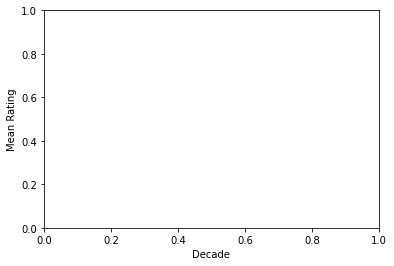

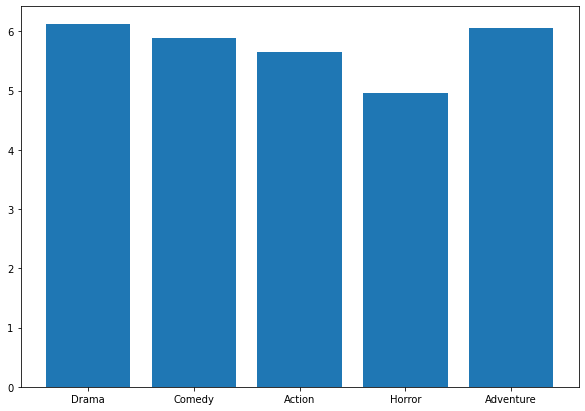

In [ ]:
fig,ax = plt.subplots(1)
plt.figure(figsize=(10,7))
ax.set_xlabel('Decade')
ax.set_ylabel('Mean Rating')
plt.bar(["Drama" ,"Comedy","Action","Horror","Adventure"],genres_mean_rating_10s)

**As shown above in barchart , the most trending movies genre in 2010's generation  are "Drama"  and "Adventure"**

**Along the decades, people mostly preferred movies related to Drama and after that comes either Comedy movies and Adventure movies. However, movies related to Action and Horror remained as the least preferable types of movies from the most watched types of movies.**